# Implementing a Neural Net with a Gardening Dataset
by [Andreas Schneider](mailto:Andreas.Schneider@hs-heilbronn.de), [Pascal Graf](mailto:Pascal.Graf@hs-heilbronn.de), and [Nicolaj Stache](mailto:Nicolaj.Stache@hs-heilbronn.de), Heilbronn University of Applied Sciences


In this example, you are supposed to create a network by using pure Python and Numpy which determines optimal conditions for fostering plants, given exposure to sunshine and exposure to water. 

Hence, the available dataset has two features (exposure to sunshine and exposure to water) and one output variable, which shows whether the ratio was healthy for a general flower or not.

Disclaimer: The dataset is dummy data and not neccessarily correct.

## Import Libs

In [1]:
import numpy as np
# Set amount of decimal places
np.set_printoptions(4)

## Load data

In [2]:
features = np.load("features.npy")
targets = np.load("targets.npy")

## Let's visualise the data.

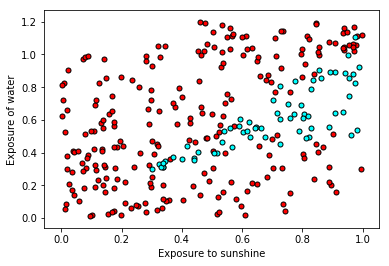

FEATURES:
 [[ 0.6037  0.9979]
 [ 0.5185  0.1266]
 [ 0.7262  0.4545]
 [ 0.9624  0.5072]
 [ 0.3328  0.0636]]
TARGETS:
 [[0]
 [0]
 [1]
 [1]
 [0]]
ARRAY SHAPE FEATURES:
 (300, 2)
ARRAY SHAPE TARGETS:
 (300, 1)


In [3]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points():
    X = np.array(features)
    y = np.array(targets)
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Exposure to sunshine')
    plt.ylabel('Exposure of water')
    
# Plotting the points
plot_points()
plt.show()
print("FEATURES:\n", features[:5])
print("TARGETS:\n", targets[:5])
print("ARRAY SHAPE FEATURES:\n", features.shape)
print("ARRAY SHAPE TARGETS:\n", targets.shape)

# Let's do 1 Iteration with one sample
1. Forward Pass with random initialized weights
2. Backward Pass (Backpropagation) to update weights
3. Forward Pass with updated weights

## First of all - Define the activation function

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg" width="600" align="left" />  
<br /> 
<br /> <br /> 
<br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> 
<br /> 
**Quelle:** https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg

> **Task:** Please define a function, which calculates the sigmoid and returns it.

In [4]:
def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

## Randomly initalize weights

In [5]:
weights_input_hidden = np.array([[0.8, 0.4, 0.3],
                                 [0.2, 0.9, 0.5]])

weights_hidden_output = np.array([[0.3, 0.5, 0.9]]).transpose()

## Just take one sample of data

In [6]:
feature1 = np.array([[1.0 , 1.0]])
target1 = np.array([[0.0]])

print("Input Data:", feature1, "\nTarget Value:", target1)

Input Data: [[ 1.  1.]] 
Target Value: [[ 0.]]


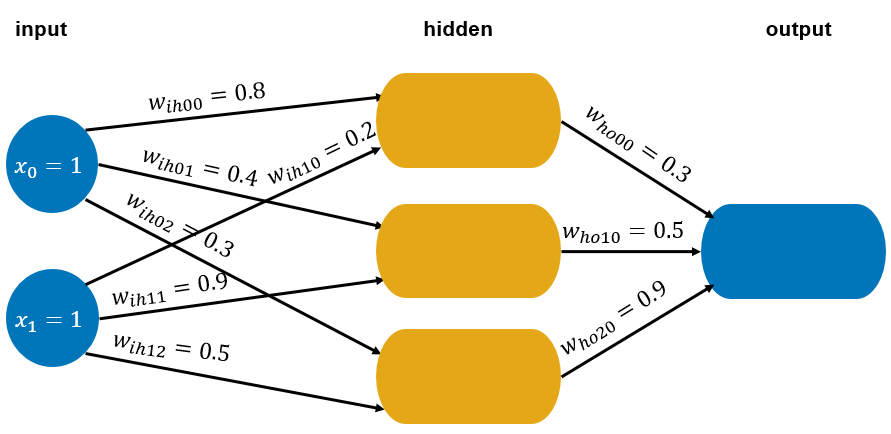

## Lets do the first forward pass

To perform the forward pass, we need to do four steps!
- First, we compute the weighted sum of inputs (note: bias is not considered here) $h_{in} = \sum\limits_{i} w_i x_i$
- Second, we compute the output $f(h_{out}) = sigmoid(h_{in})$  
- Third, we compute the input to the output node, which is the weighted sum of the hidden outputs $f(h_{out})$
- Finally, we compute the output of the network by taken the sigmoid of the previous result

Please note, that the computation can be done by matrix multiplication, as shown below:

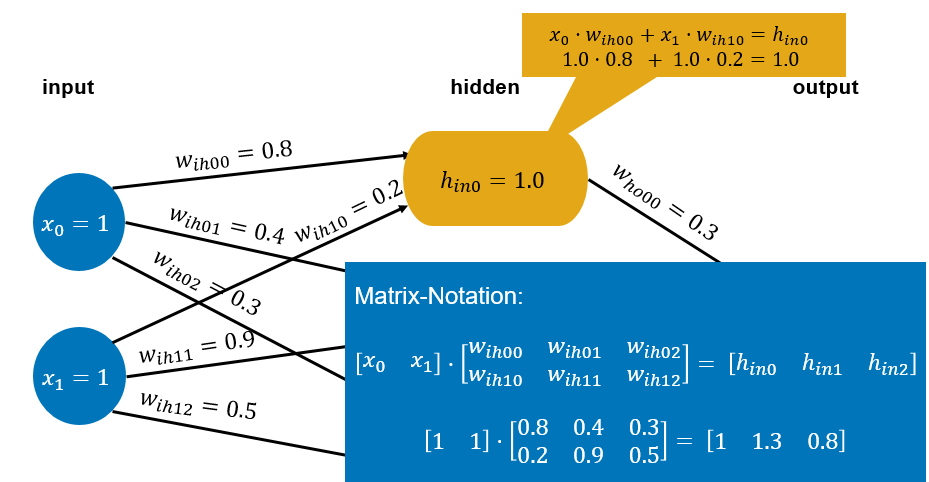

> ** Task:** Before you start with implementing the gaps in the code, please do a visualization of all the matrix algebra, with focus on the dimensions. The example below may help you.

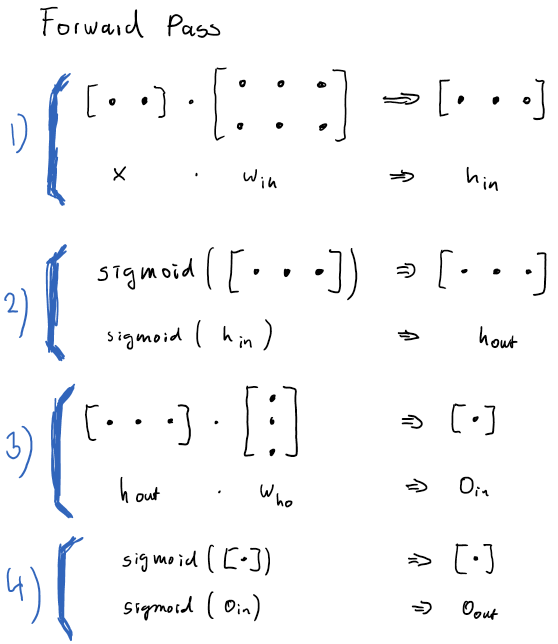

In [7]:
## Forward pass
hidden_layer_input = np.dot(feature1, weights_input_hidden)
print('hidden layer input: ', hidden_layer_input)

hidden_layer_output = sigmoid(hidden_layer_input)
print('hidden layer output: ', hidden_layer_output,'\n')

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
print('output layer input: ', output_layer_in)

output = sigmoid(output_layer_in)
print('output layer output: ', output)

hidden layer input:  [[ 1.   1.3  0.8]]
hidden layer output:  [[ 0.7311  0.7858  0.69  ]] 

output layer input:  [[ 1.2332]]
output layer output:  [[ 0.7744]]


## Define the derivate of sigmoid (neccessary for Backpropagation)

In [8]:
def sigmoid_prime(x):
    """
    Calculate derivative of sigmoid
    """
    return sigmoid(x) * (1 - sigmoid(x))

## Backward Pass

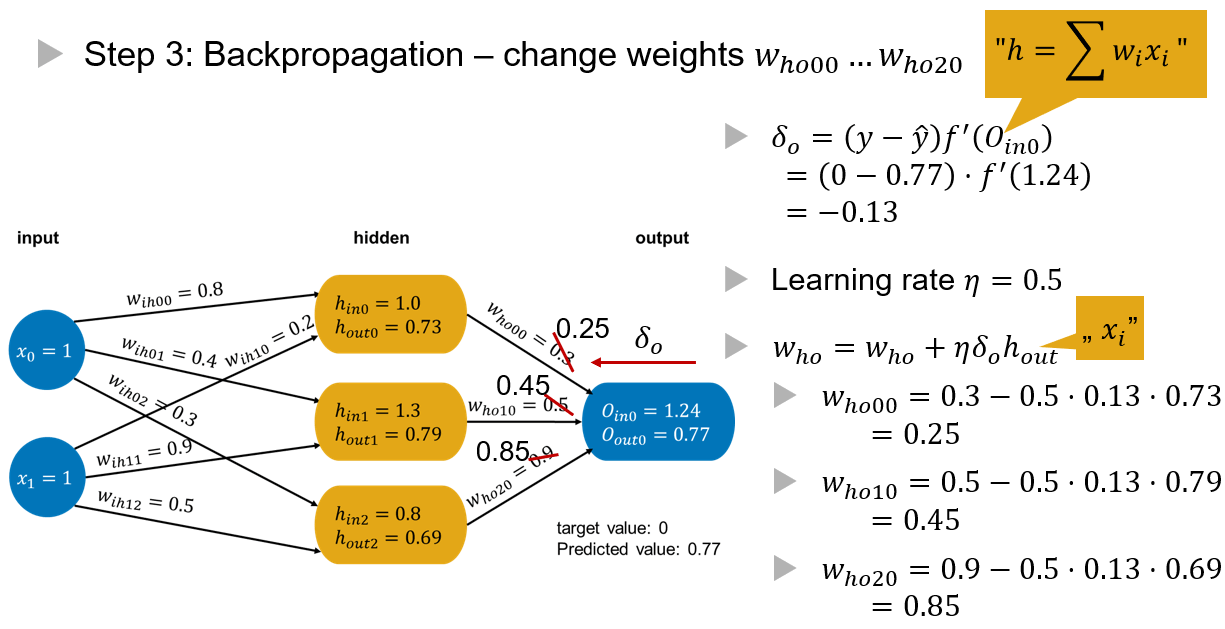

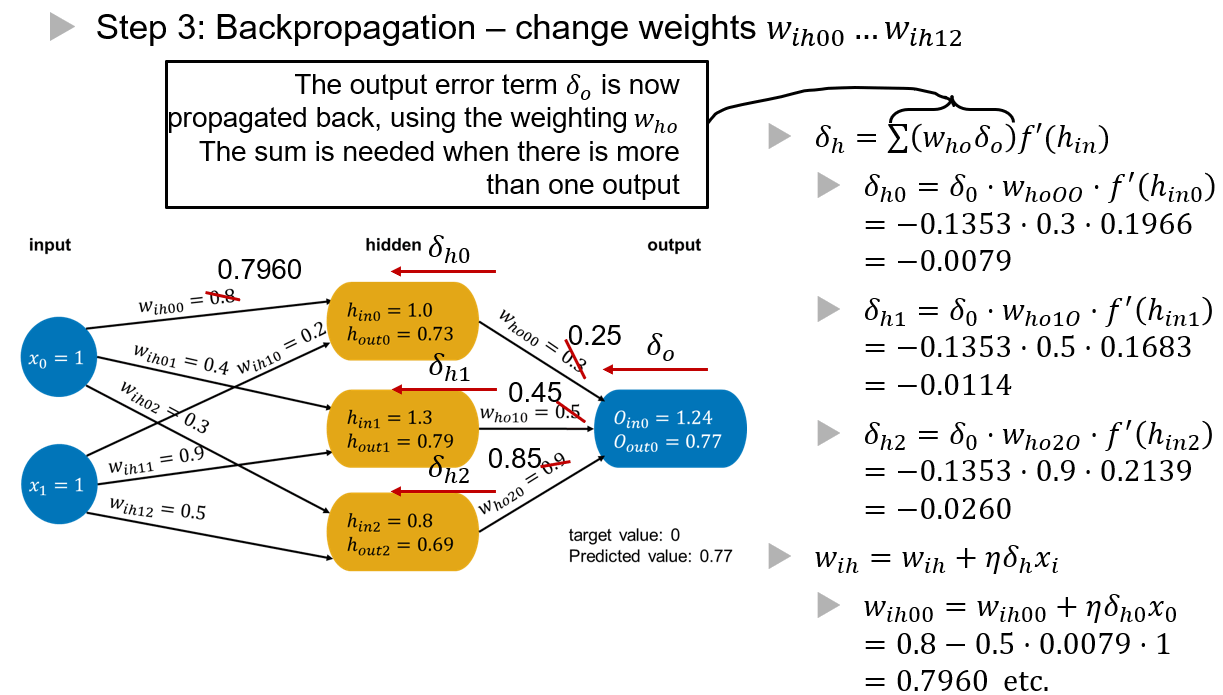

> **Task:** Before you start coding the backward pass, it is essential that you visualize the matrix algebra as done for the forward pass. You are supposed to use the same shape of matrices for the weights and the inputs like in the forward pass. 
For achieving this, you will need to transpose some matrices or even change the order that the result represents the desired output (like in the image above). Please create a cell below and insert an image of your visualization.

Your visualization of the matrices of the backward pass:
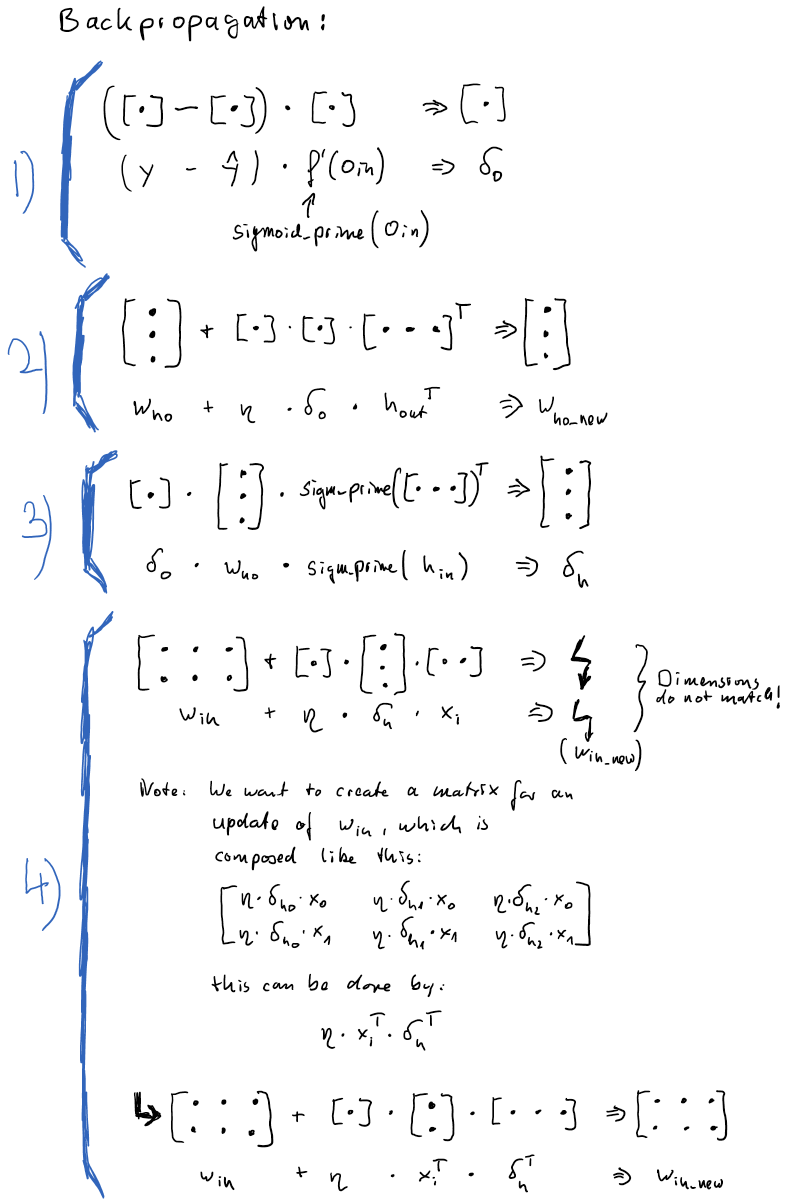

> **Task:** Now, fill in the gaps in the code below

In [9]:
learnrate = 0.5

# Calculate output error
error = target1 - output

# Calculate error term for output layer
output_error_term = error * sigmoid_prime(output_layer_in)
print('output_error_term: \n', output_error_term, '\n')

# Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output.transpose()
print('delta_w hidden to output: \n', delta_w_h_o, '\n')

weights_hidden_output_new = weights_hidden_output + delta_w_h_o 
print('updated weights hidden to output: \n', weights_hidden_output_new, '\n')

# Calculate error term for hidden layer
hidden_error_term = output_error_term * weights_hidden_output * sigmoid_prime(hidden_layer_input).transpose()
print('hidden_error_term: \n', hidden_error_term, '\n')

# Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * np.dot(feature1.transpose(), hidden_error_term.transpose()) 
print('delta_w hidden to input: \n', delta_w_i_h, '\n')

weights_input_hidden_new = weights_input_hidden + delta_w_i_h
print('updated weights input to hidden: \n', weights_input_hidden_new, '\n')

print('Change in weights for hidden layer to output layer: \n', delta_w_h_o, '\n')
print('Change in weights for input layer to hidden layer:\n', delta_w_i_h, '\n')

output_error_term: 
 [[-0.1353]] 

delta_w hidden to output: 
 [[-0.0495]
 [-0.0532]
 [-0.0467]] 

updated weights hidden to output: 
 [[ 0.2505]
 [ 0.4468]
 [ 0.8533]] 

hidden_error_term: 
 [[-0.008 ]
 [-0.0114]
 [-0.026 ]] 

delta_w hidden to input: 
 [[-0.004  -0.0057 -0.013 ]
 [-0.004  -0.0057 -0.013 ]] 

updated weights input to hidden: 
 [[ 0.796   0.3943  0.287 ]
 [ 0.196   0.8943  0.487 ]] 

Change in weights for hidden layer to output layer: 
 [[-0.0495]
 [-0.0532]
 [-0.0467]] 

Change in weights for input layer to hidden layer:
 [[-0.004  -0.0057 -0.013 ]
 [-0.004  -0.0057 -0.013 ]] 



## Forward Pass with updated Weights

In [10]:
## Forward pass
hidden_layer_input = np.dot(feature1, weights_input_hidden_new)
print('hidden layer input:  ', hidden_layer_input)

hidden_layer_output = sigmoid(hidden_layer_input)
print('hidden layer output: ', hidden_layer_output,'\n')

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output_new)
print('output layer input:  ', output_layer_in)

output = sigmoid(output_layer_in)
print('output layer output: ', output)

hidden layer input:   [[ 0.992   1.2886  0.774 ]]
hidden layer output:  [[ 0.7295  0.7839  0.6844]] 

output layer input:   [[ 1.117]]
output layer output:  [[ 0.7534]]


# Run the training on all data samples

#### Split the data into features and targets

In [11]:
# If you have not executed the code cells above, you can execute the required parts from above here!!!

import numpy as np

features = np.load("features.npy")
targets = np.load("targets.npy")

In [12]:
# Hyperparameters

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("!! The depicted loss value is the mean over all training samples !!")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

epochs = 2000
learnrate = 20

n_records, n_features = features.shape

weights_input_hidden = np.array([[0.8, 0.4, 0.3],
                                 [0.2, 0.9, 0.5]])

weights_hidden_output = np.array([[0.3, 0.5, 0.9]]).transpose()

print('weights_input_hidden:\n', weights_input_hidden, '\n')
print('weights_hidden_output:\n', weights_hidden_output, '\n')

def forward_pass(inputs):
        hidden_input = np.dot(inputs, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)
        output_input = np.dot(hidden_output, weights_hidden_output)
        output_output = sigmoid(output_input)
        return hidden_input, hidden_output, output_input, output_output
    
def backward_pass(target, hidden_input, output_input, output_output):
        error = target - output_output
        output_error_term = error * sigmoid_prime(output_input)
        hidden_error = output_error_term * weights_hidden_output
        hidden_error_term = hidden_error * sigmoid_prime(hidden_input).transpose()
        return hidden_error_term, output_error_term
    
for e in range(epochs):
    
    _, _, _, output_output = forward_pass(features)
    if e % (epochs / 10) == 0:        
        print("________________________________________________________________")
        loss = np.mean((np.subtract(targets, output_output)) ** 2)
        print("Interation:", e, ", Current Loss:",loss) 
    
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    
    for x, y in zip(features, targets):  
        
        # store vector x as a 2d matrix
        x = np.reshape(x,(1,-1))

        # Forward Pass
        hidden_input, hidden_output, output_input, output_output = forward_pass(x)
        
        # Backward Pass
        hidden_error_term, output_error_term = backward_pass(y, hidden_input, output_input, output_output)
        
        # Delta for Weight Update
        del_w_hidden_output +=  output_error_term * hidden_output.transpose()
        del_w_input_hidden += x.transpose() * hidden_error_term.transpose()      

    # Weight Update
    weights_input_hidden +=  learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records
    
# Test the network
print()
print("Final Test")
print("________________________________________________________________")
_, _, _, output_output = forward_pass(features)
loss = np.mean((np.subtract(targets, output_output)) ** 2)
print("Interation:", epochs, ", Current Loss:",loss)

print()
print('weights_input_hidden:\n', weights_input_hidden, '\n')
print('weights_hidden_output:\n', weights_hidden_output, '\n')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
!! The depicted loss value is the mean over all training samples !!
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
weights_input_hidden:
 [[ 0.8  0.4  0.3]
 [ 0.2  0.9  0.5]] 

weights_hidden_output:
 [[ 0.3]
 [ 0.5]
 [ 0.9]] 

________________________________________________________________
Interation: 0 , Current Loss: 0.443320583259
________________________________________________________________
Interation: 200 , Current Loss: 0.143844616733
________________________________________________________________
Interation: 400 , Current Loss: 0.136082578666
________________________________________________________________
Interation: 600 , Current Loss: 0.124769816194
________________________________________________________________
Interation: 800 , Current Loss: 0.113020783123
________________________________________________________________
Interation: 1000 , Current Loss: 0.105110829574
________

## Predict a Value

> **TASK:** Do a test by yourself. Provide 2 input values and get a result.

In [13]:
np.set_printoptions(2, suppress=True)

# Must be ~1
test_sample_1 = np.array([[1, 0.8]])
# Must be ~0
test_sample_2 = np.array([[0.8, 0.1]])
# Dificult to predict
test_sample_3 = np.array([[0.5, 0.3]])

_, _, _, erg1 = forward_pass(test_sample_1)
_, _, _, erg2 = forward_pass(test_sample_2)
_, _, _, erg3 = forward_pass(test_sample_3)

print("Sample 1 (Should be clearly 1) - Predicted:", erg1)
print("Sample 2 (Should be clearly 0) - Predicted:", erg2)
print("Sample 3 (Difficult to predict) - Predicted:", erg3)

Sample 1 (Should be clearly 1) - Predicted: [[ 0.95]]
Sample 2 (Should be clearly 0) - Predicted: [[ 0.]]
Sample 3 (Difficult to predict) - Predicted: [[ 0.42]]


## Double check with the dataset
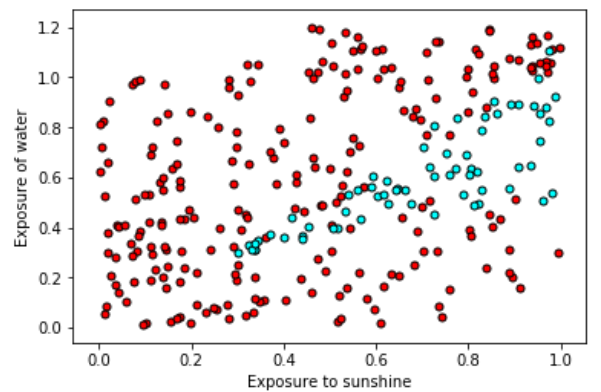
### It works! Great!